In [39]:
import pandas as pd
import numpy as np
import os, sys
from dotenv import load_dotenv
import matplotlib.pyplot as plt
sys.path.insert(1, '..\classes')
from PlottingData import PlotData as pltd
from ProcessingData import ProcessData as proc

# NN imports
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.utils import plot_model, pad_sequences

#Library for evaluation and split data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [13]:
load_dotenv()
SEED = 42
PROCESSED_DATA_PATH = os.getenv('PROCESSED_DATA_PATH')
train_data = pd.read_csv(PROCESSED_DATA_PATH+'train_data_cleaned.csv')

In [14]:
X = train_data['review'].str.lower()
Y = train_data['target']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=SEED)

In [16]:
# Preparing to train model
tokenizer = Tokenizer(num_words=10000, oov_token="<00V>")
tokenizer.fit_on_texts(X_train)

In [17]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [18]:
X_train = pad_sequences(sequences=X_train, maxlen=500, padding='pre',truncating='post')
X_test = pad_sequences(sequences=X_test, maxlen=500, padding='pre',truncating='post')

In [19]:
print(X_train.shape)

(40000, 500)


In [20]:
model = Sequential()
model.add(Embedding(10000, 128, input_length=500))
model.add(Dropout(.4))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dropout(.4))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
             metrics=["accuracy"], loss="binary_crossentropy")

early_stopping = EarlyStopping(monitor='loss',patience=3)
history = model.fit(
    X_train, Y_train, batch_size=64,
    epochs=10, validation_data=(X_test, Y_test),
    callbacks=[early_stopping])


Epoch 1/10
625/625 [==============================] - 101s 153ms/step - loss: 0.3867 - accuracy: 0.8277 - val_loss: 0.2719 - val_accuracy: 0.8872
Epoch 2/10
625/625 [==============================] - 95s 152ms/step - loss: 0.2941 - accuracy: 0.8862 - val_loss: 0.2906 - val_accuracy: 0.8794
Epoch 3/10
625/625 [==============================] - 95s 152ms/step - loss: 0.2664 - accuracy: 0.8997 - val_loss: 0.3142 - val_accuracy: 0.8689
Epoch 4/10
625/625 [==============================] - 98s 157ms/step - loss: 0.2389 - accuracy: 0.9108 - val_loss: 0.2518 - val_accuracy: 0.8938
Epoch 5/10
625/625 [==============================] - 93s 149ms/step - loss: 0.2115 - accuracy: 0.9209 - val_loss: 0.2724 - val_accuracy: 0.8877
Epoch 6/10
625/625 [==============================] - 94s 151ms/step - loss: 0.1900 - accuracy: 0.9304 - val_loss: 0.2618 - val_accuracy: 0.8985
Epoch 7/10
625/625 [==============================] - 100s 160ms/step - loss: 0.1712 - accuracy: 0.9382 - val_loss: 0.2760 - val_

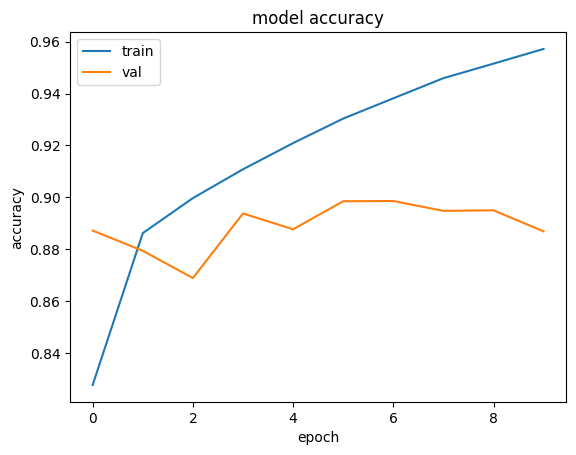

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

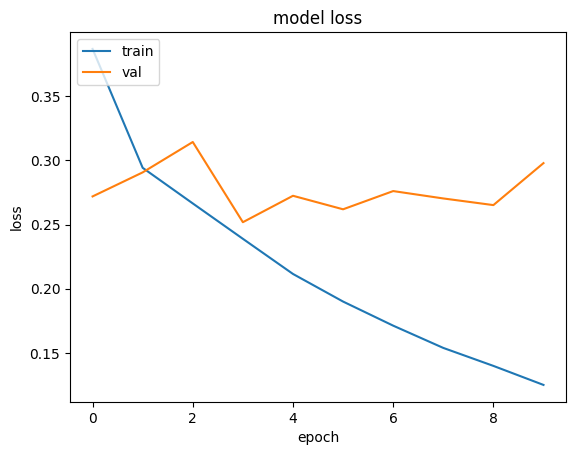

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()